In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,NaN,NaN,NaN,26.6,0.351,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,NaN,60.0,0.0,NaN,NaN,0.349,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	38
float64		column 2	190
float64		column 3	76
float64		column 4	114
float64		column 5	228
float64		column 6	228
float64		column 7	76
float64		column 8	266


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,730.000000,578.000000,692.000000,654.000000,540.000000,540.000000,692.000000,502.000000
mean,3.824658,119.960208,69.013006,20.148318,78.768519,31.889259,0.469912,33.231076
std,3.357435,32.828795,19.629082,15.731408,114.546278,7.498237,0.331536,11.711024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,97.250000,63.500000,0.000000,0.000000,27.100000,0.242500,24.000000
50%,3.000000,115.500000,72.000000,22.500000,24.000000,31.900000,0.369000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.350000,0.627500,40.000000
max,17.000000,199.000000,122.000000,60.000000,846.000000,59.400000,2.420000,81.000000


<AxesSubplot:>

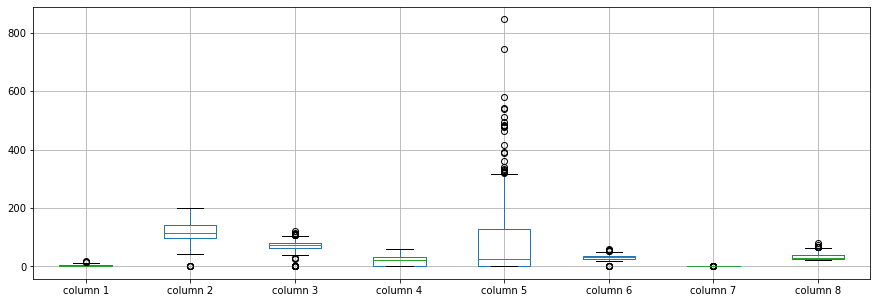

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.824658
column 2    119.960208
column 3     69.013006
column 4     20.148318
column 5     78.768519
column 6     31.889259
column 7      0.469912
column 8     33.231076
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.128723,0.160144,-0.075188,-0.108173,0.037571,-0.037937,0.544413
column 2,0.128723,1.000000,0.145002,-0.025732,0.343954,0.198095,0.131532,0.277370
column 3,0.160144,0.145002,1.000000,0.177355,0.046355,0.194493,0.009516,0.214335
column 4,-0.075188,-0.025732,0.177355,1.000000,0.429051,0.332391,0.172570,-0.170856
column 5,-0.108173,0.343954,0.046355,0.429051,1.000000,0.158317,0.227494,-0.060595
column 6,0.037571,0.198095,0.194493,0.332391,0.158317,1.000000,0.168785,0.085548
column 7,-0.037937,0.131532,0.009516,0.172570,0.227494,0.168785,1.000000,0.012602
column 8,0.544413,0.277370,0.214335,-0.170856,-0.060595,0.085548,0.012602,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+44,8+44+44,8+44+44+44,8+44+44+44+44,8+44+44+44+44+44,8+44+44+44+44,8+44+44+44,8+44+44,8+44,8], vae_layer = False, seed = 44)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 320.75709374745685
Epoch: 1 , loss: 319.9653202692668
Epoch: 2 , loss: 319.14510186513263
Epoch: 3 , loss: 321.0197795232137
Epoch: 4 , loss: 318.99805132548016
Epoch: 5 , loss: 318.10071659088135
Epoch: 6 , loss: 316.8543405532837
Epoch: 7 , loss: 316.54238414764404
Epoch: 8 , loss: 315.94892088572186
Epoch: 9 , loss: 314.5361827214559
Epoch: 10 , loss: 311.2361885706584
Epoch: 11 , loss: 310.8665192921956
Epoch: 12 , loss: 308.604310353597
Epoch: 13 , loss: 308.57443046569824
Epoch: 14 , loss: 305.1908248265584
Epoch: 15 , loss: 302.1608721415202
Epoch: 16 , loss: 300.2182626724243
Epoch: 17 , loss: 293.95882924397785
Epoch: 18 , loss: 293.9168640772502
Epoch: 19 , loss: 289.75746091206867
Epoch: 20 , loss: 283.6130771636963
Epoch: 21 , loss: 280.1501003901164
Epoch: 22 , loss: 273.6832373936971
Epoch: 23 , loss: 269.06344922383624
Epoch: 24 , loss: 264.87278175354004
Epoch: 25 , loss: 260.82361888885

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,-7.390129,-10.747738,50.733795,0.000000,0.0,-1.679247
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
764,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
765,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
766,0.0,-48.917671,0.000000,0.000000,43.865971,-5.613708,0.0,-21.747553


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2361.5066855557257, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.40880732527854413

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    112.767273
column 3     88.000000
column 4     22.913389
column 5      0.000000
column 6     35.806320
column 7      0.855000
column 8     36.937298
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.000000,72.000000,35.000000,0.000000,33.600000,0.627,50.000000
1,1.0,85.000000,58.609871,18.252262,50.733795,26.600000,0.351,29.320753
2,8.0,183.000000,64.000000,0.000000,0.000000,23.300000,0.672,32.000000
3,1.0,89.000000,66.000000,23.000000,94.000000,28.100000,0.167,21.000000
4,0.0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.0,101.000000,76.000000,48.000000,180.000000,32.900000,0.171,63.000000
764,2.0,122.000000,70.000000,27.000000,0.000000,36.800000,0.340,27.000000
765,5.0,121.000000,72.000000,23.000000,112.000000,26.200000,0.245,30.000000
766,1.0,77.082329,60.000000,0.000000,43.865971,24.486292,0.349,25.252447


In [20]:
imputations[-1].to_excel("PID_AN_20.xlsx", index=False, header=False)